# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns   

In [ ]:
#globally set column display options
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
#Load and Preview Data

In [ ]:
#base path to processed data
processed_base="../data/processed"

#list of files to be read
shot_events = [
    'afcon_2023_shots',
    'copa_am_2024_shots', 
    'euro_2020_shots',
    'euro_2024_shots',
    'wc_2018_shots',
    'wc_2022_shots'
    ]

#dictionary to store all the dataframes
dfs={}

for event in shot_events:
    print(f'Creating dataframe with {event}')

    shot_events_path = os.path.join(processed_base,f'{event}.csv')

    df = pd.read_csv(shot_events_path)
    
    dfs[event]=df #store in df in dictionary

    print(f" {event} has {df.shape[0]} rows and {df.shape[1]} columns")

Creating dataframe with afcon_2023_shots
 afcon_2023_shots has 1244 rows and 45 columns
Creating dataframe with copa_am_2024_shots
 copa_am_2024_shots has 790 rows and 43 columns
Creating dataframe with euro_2020_shots
 euro_2020_shots has 1289 rows and 46 columns
Creating dataframe with euro_2024_shots
 euro_2024_shots has 1340 rows and 46 columns
Creating dataframe with wc_2018_shots
 wc_2018_shots has 1706 rows and 42 columns
Creating dataframe with wc_2022_shots
 wc_2022_shots has 1494 rows and 45 columns


In [ ]:
#check if similar column headings

from collections import Counter

In [ ]:
column_counts = Counter()

for name, df in dfs.items():
    column_counts.update(df.columns)

# Total number of DataFrames
n_dfs = len(dfs)

non_overlapping_columns= [col for col, count in column_counts.items() if count < n_dfs]
print("Non overlapping columns:",non_overlapping_columns)

6
Non overlapping columns: ['shot.saved_to_post', 'out', 'shot.saved_off_target', 'off_camera', 'shot.follows_dribble']


Non overlapping columns are not crucial to model development

Non overlapping columns will be dropped prior to merge

In [ ]:
final_column_counts = Counter()

for name, df in dfs.items():
    df=df.copy()

    #drop columns from dfs that exist in non overlapping columns
    cols_to_drop = [col for col in non_overlapping_columns if col in df.columns]

    if cols_to_drop:
        df.drop(cols_to_drop,axis=1, inplace=True)

    #update dictionary with updated df
    dfs[name] = df

    #track changes
    final_column_counts.update(df.columns)


# 1st check: How many times columns appear in dictionary
print("\n Final column appearance across datasets:")
for col, count in final_column_counts.items():
    print(f"{col}: {count} times")

# Check number of columns shared across Dataframes 
all_column_sets = [set(df.columns) for df in dfs.values()]
shared_cols = set.intersection(*all_column_sets)
print(f"\n Number of shared columns across all DataFrames: {len(shared_cols)}")
print(f" Shared Columns: {sorted(shared_cols)}")

# Confirmation check 
unique_column_sets = set(map(lambda cols: tuple(sorted(cols)), all_column_sets))
if len(unique_column_sets) == 1:
    print("\n All DataFrames now have the same columns. Ready to concatenate!")
else:
    print("\n Not all DataFrames have identical columns. Check for leftover inconsistencies.")



 Final column appearance across datasets:
id: 6 times
index: 6 times
period: 6 times
timestamp: 6 times
minute: 6 times
second: 6 times
possession: 6 times
location: 6 times
duration: 6 times
related_events: 6 times
type.id: 6 times
type.name: 6 times
possession_team.id: 6 times
possession_team.name: 6 times
play_pattern.id: 6 times
play_pattern.name: 6 times
team.id: 6 times
team.name: 6 times
player.id: 6 times
player.name: 6 times
position.id: 6 times
position.name: 6 times
shot.statsbomb_xg: 6 times
shot.end_location: 6 times
shot.key_pass_id: 6 times
shot.outcome.id: 6 times
shot.outcome.name: 6 times
shot.technique.id: 6 times
shot.technique.name: 6 times
shot.body_part.id: 6 times
shot.body_part.name: 6 times
shot.type.id: 6 times
shot.type.name: 6 times
shot.freeze_frame: 6 times
under_pressure: 6 times
shot.aerial_won: 6 times
shot.first_time: 6 times
shot.deflected: 6 times
shot.one_on_one: 6 times
shot.open_goal: 6 times
shot.redirect: 6 times

 Number of shared columns acr

In [21]:
#concatnate

for name, df in dfs.items():
    df['source'] = name
    dfs[name] = df #updating the df

df = pd.concat(dfs.values(), ignore_index=True)

print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 7863 rows and 42 columns


In [22]:
#preview dataframe
df.head(3)

,id,index,period,timestamp,minute,second,possession,location,duration,related_events,...,shot.type.name,shot.freeze_frame,under_pressure,shot.aerial_won,shot.first_time,shot.deflected,shot.one_on_one,shot.open_goal,shot.redirect,source
0,9a9e2541-abf2-4642-a25d-2cda56da5d6f,194,1,00:03:39.160,3,39,11,"[103.7, 33.9]",0.805714,['4820e1f6-012a-4a42-a85d-dfeb20b03a98'],...,Open Play,"[{'location': [107.2, 31.4], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,afcon_2023_shots
1,90d772af-6ca8-4150-86c5-f83041c2e491,338,1,00:08:33.215,8,33,19,"[114.4, 34.0]",0.680430,"['8003bb23-c6e3-4a02-ab84-213528d90070', 'e50e...",...,Open Play,"[{'location': [115.3, 34.2], 'player': {'id': ...",True,True,NaN,NaN,NaN,NaN,NaN,afcon_2023_shots
2,3ed4c052-5623-47f9-a0c4-13b0ff964898,755,1,00:18:09.307,18,9,34,"[111.8, 48.3]",1.512692,['2e946ac9-2713-4c40-a6ef-9c8e8ce243cf'],...,Open Play,"[{'location': [120.0, 57.0], 'player': {'id': ...",NaN,NaN,True,NaN,NaN,NaN,NaN,afcon_2023_shots


In [23]:
#General information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7863 entries, 0 to 7862
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7863 non-null   object 
 1   index                 7863 non-null   int64  
 2   period                7863 non-null   int64  
 3   timestamp             7863 non-null   object 
 4   minute                7863 non-null   int64  
 5   second                7863 non-null   int64  
 6   possession            7863 non-null   int64  
 7   location              7863 non-null   object 
 8   duration              7863 non-null   float64
 9   related_events        7863 non-null   object 
 10  type.id               7863 non-null   int64  
 11  type.name             7863 non-null   object 
 12  possession_team.id    7863 non-null   int64  
 13  possession_team.name  7863 non-null   object 
 14  play_pattern.id       7863 non-null   int64  
 15  play_pattern.name    

In [24]:
# Display all duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print("\nDuplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 0

Duplicate rows:
Empty DataFrame
Columns: [id, index, period, timestamp, minute, second, possession, location, duration, related_events, type.id, type.name, possession_team.id, possession_team.name, play_pattern.id, play_pattern.name, team.id, team.name, player.id, player.name, position.id, position.name, shot.statsbomb_xg, shot.end_location, shot.key_pass_id, shot.outcome.id, shot.outcome.name, shot.technique.id, shot.technique.name, shot.body_part.id, shot.body_part.name, shot.type.id, shot.type.name, shot.freeze_frame, under_pressure, shot.aerial_won, shot.first_time, shot.deflected, shot.one_on_one, shot.open_goal, shot.redirect, source]
Index: []

[0 rows x 42 columns]


In [23]:
# To see which rows are exactly identical
#print("\nGrouped duplicate rows with counts:")
#duplicate_counts = df.groupby(df.columns.tolist()).size().reset_index(name='count')
#print(duplicate_counts[duplicate_counts['count'] > 1])

What is xG? 

1. The acronym stands for Expected Goals. It represents the probability of a shot resulting in a goal
    * example: xG -> 0.2: likely to score 2 goals from 10 shots

How is xG calculated?
1. Parameters: 
    *   distance to goal
    *   angle to goal
    *   body part used
    *   type of assist/previous action(through ball, cross etc)
2. The model then calculates a probability of a goal between 0 and 1 
    *   1 means absolute certainty
    *   0 means no certainty


source: StatsBomb


To build a basic xG model

*   It Requires feaures that 
    a.  are known at the moment of the shot, 
    b.  affect the likelihood of scoring  
    c.  available consistently for all shots 
 


In [25]:
#check features available
print("Features available in the dataset:")
df.columns.tolist()

Features available in the dataset:


['id',
 'index',
 'period',
 'timestamp',
 'minute',
 'second',
 'possession',
 'location',
 'duration',
 'related_events',
 'type.id',
 'type.name',
 'possession_team.id',
 'possession_team.name',
 'play_pattern.id',
 'play_pattern.name',
 'team.id',
 'team.name',
 'player.id',
 'player.name',
 'position.id',
 'position.name',
 'shot.statsbomb_xg',
 'shot.end_location',
 'shot.key_pass_id',
 'shot.outcome.id',
 'shot.outcome.name',
 'shot.technique.id',
 'shot.technique.name',
 'shot.body_part.id',
 'shot.body_part.name',
 'shot.type.id',
 'shot.type.name',
 'shot.freeze_frame',
 'under_pressure',
 'shot.aerial_won',
 'shot.first_time',
 'shot.deflected',
 'shot.one_on_one',
 'shot.open_goal',
 'shot.redirect',
 'source']

#### Features for the MVP model 

Feature selection guided by research:

1.  shot.statsbomb_xg -> comparison, not for training
2.  location -> calculate distance and angle of shot
3.  shot.body_part.name -> impacts quality(foot, head, etc)
4.  shot.type.name -> open play, free kick etc
5.  under_pressure -> impacts shot accuracy 
6.  shot.technique.name -> Volley, half-volley, etc.
7.  shot.first_time -> Quicker shots often = higher xG 
8.  shot.open_goal -> Obvious predictor of scoring
9.  shot.deflected -> Adds randomness to outcome 
10. shot.one_on_one -> Big chances; should increase xG
11. shot.outcome.name -> target label


*   ids, indexes, timestamps -> these data points are not predictive of outcome, would add noise; will not be used
*   for this basic model player.name, team.name and other similar descriptors will not be included






In [40]:
#create a copy of the dataframe for further processing
df_xg= df.copy()

In [41]:
print(f"Total no. of features: {len(df_xg.columns)}")

#remove features that end with .id 
feature_list =[feature for feature in df_xg.columns.tolist() if not ".id" in feature.lower()]
print(f"Total no. of features: {len(feature_list)}")

# Print removed features for verification
removed_features = [f for f in df_xg.columns if f not in feature_list]
print(f"\nRemoved features: \n{removed_features}")

Total no. of features: 42
Total no. of features: 32

Removed features: 
['type.id', 'possession_team.id', 'play_pattern.id', 'team.id', 'player.id', 'position.id', 'shot.outcome.id', 'shot.technique.id', 'shot.body_part.id', 'shot.type.id']


In [42]:
#features to be removed
features_to_remove= ['id','index','period','timestamp','minute','second', 'possession',
                     'duration', 'related_events','possession_team.name','team.name',
                     'player.name','position.name','shot.key_pass_id','shot.freeze_frame','out'
                     ]

#updated feature list
feature_list_updated = [f for f in feature_list if f not in features_to_remove]
print(f"\nUpdated features: \n{feature_list_updated}")
print(f"Total no. of features: {len(feature_list_updated)}")



Updated features: 
['location', 'type.name', 'play_pattern.name', 'shot.statsbomb_xg', 'shot.end_location', 'shot.outcome.name', 'shot.technique.name', 'shot.body_part.name', 'shot.type.name', 'under_pressure', 'shot.aerial_won', 'shot.first_time', 'shot.deflected', 'shot.one_on_one', 'shot.open_goal', 'shot.redirect', 'source']
Total no. of features: 17


In [43]:
#update dataframe
df_xg = df_xg[feature_list_updated]

#verify changes
print(f"Dataframe now has {len(df_xg.columns)} columns")
print(f"\nList of features in df_xg: \n{df_xg.columns.tolist()}")

Dataframe now has 17 columns

List of features in df_xg: 
['location', 'type.name', 'play_pattern.name', 'shot.statsbomb_xg', 'shot.end_location', 'shot.outcome.name', 'shot.technique.name', 'shot.body_part.name', 'shot.type.name', 'under_pressure', 'shot.aerial_won', 'shot.first_time', 'shot.deflected', 'shot.one_on_one', 'shot.open_goal', 'shot.redirect', 'source']


In [44]:
df_xg.head(2)

,location,type.name,play_pattern.name,shot.statsbomb_xg,shot.end_location,shot.outcome.name,shot.technique.name,shot.body_part.name,shot.type.name,under_pressure,shot.aerial_won,shot.first_time,shot.deflected,shot.one_on_one,shot.open_goal,shot.redirect,source
0,"[103.7, 33.9]",Shot,From Counter,0.056426,"[120.0, 42.8, 1.5]",Goal,Normal,Right Foot,Open Play,NaN,NaN,NaN,NaN,NaN,NaN,NaN,afcon_2023_shots
1,"[114.4, 34.0]",Shot,From Corner,0.091472,"[120.0, 35.6, 4.3]",Off T,Normal,Head,Open Play,True,True,NaN,NaN,NaN,NaN,NaN,afcon_2023_shots


In [45]:
#check for missing values (percentage)
df_xg.isna().mean()*100

location                0.000000
type.name               0.000000
play_pattern.name       0.000000
shot.statsbomb_xg       0.000000
shot.end_location       0.000000
shot.outcome.name       0.000000
shot.technique.name     0.000000
shot.body_part.name     0.000000
shot.type.name          0.000000
under_pressure         76.472084
shot.aerial_won        90.805036
shot.first_time        72.631311
shot.deflected         98.435712
shot.one_on_one        95.243546
shot.open_goal         99.135190
shot.redirect          99.809233
source                  0.000000
dtype: float64

In [46]:
#examine features with missingness
#1.under_pressure
print("1.under_pressure\nUnique values in 'under_pressure' feature:")
print(df_xg['under_pressure'].unique())

#2. shot.type.name
print(f"\n2.shot_type\nUnique values in 'shot.type_name': \n{df_xg['shot.type.name'].unique()}")

#3. body_part
print(f"\n3.shot.body_part.name\nUnique values in 'shot.body_part' \n{df_xg['shot.body_part.name'].unique()}")

#4 shot.first_time
print(f"\n4.shot.first_time\nUnique values in 'shot.first_time'\n{df_xg['shot.first_time'].unique()}")

#5 shot.one_on_one
print(f"\n5.shot.one_on_one\nUnique values in 'shot.one_on_one' \n{df_xg['shot.one_on_one'].unique()}")

#6 shot.aerial_won
print(f"\n6.shot.aerial_won\nUnique values in 'shot.aerial_won' \n{df_xg['shot.aerial_won'].unique()}")

#7 shot.open_goal 
print(f"\n7.shot.open_goal \nUnique values in 'shot.open_goal' \n{df_xg['shot.open_goal'].unique()}")

#8 shot.deflected
print(f"\n8.shot.deflected\nUnique values in 'shot.deflected' \n{df_xg['shot.deflected'].unique()}")

#9 shot.saved_to_post
#print(f"\n9.shot.saved_to_post\nUnique values in 'shot.saved_to_post' \n{df_xg['shot.saved_to_post'].unique()}")

#10 shot.follows_dribble
#print(f"\n10.shot.follows_dribble\nUnique values in 'shot.follows_dribble' \n{df_xg['shot.follows_dribble'].unique()}")

#11 shot.saved_off_target
#print(f"\n11.shot.saved_off_target\nUnique values in 'shot.saved_off_target' \n{df_xg['shot.saved_off_target'].unique()}")

#12 shot.redirect
print(f"\n12.shot.redirect\nUnique values in 'shot.redirect' \n{df_xg['shot.redirect'].unique()}")



1.under_pressure
Unique values in 'under_pressure' feature:
[nan True]

2.shot_type
Unique values in 'shot.type_name': 
['Open Play' 'Free Kick' 'Penalty' 'Corner']

3.shot.body_part.name
Unique values in 'shot.body_part' 
['Right Foot' 'Head' 'Left Foot' 'Other']

4.shot.first_time
Unique values in 'shot.first_time'
[nan True]

5.shot.one_on_one
Unique values in 'shot.one_on_one' 
[nan True]

6.shot.aerial_won
Unique values in 'shot.aerial_won' 
[nan True]

7.shot.open_goal 
Unique values in 'shot.open_goal' 
[nan True]

8.shot.deflected
Unique values in 'shot.deflected' 
[nan True]

12.shot.redirect
Unique values in 'shot.redirect' 
[nan True]


The features under_pressure,shot.first_time,shot.one_on_one, shot.aerial_won, shot.open_goal, shot.deflected, shot.redirect are  binary feature; indicating whether the event was occured (True) or not  (False).

Why is the data missing?
1.  It appears data collection intentionally recorded 'True' when the event occured. 
2.  It did not record a value for when the event did not occur

What type of Missing Data is This?
*   MNAR (Missing not at Random) ->
    *   missingness depends on the value itself
    *   missing due to how the data was collected
    *   NaN means -> the event did not occur (safe to treat as False)

Approach to handle missing value
*   Convert to binary values
    *   True -> 1
    *   NaN -> 0


In [51]:
def manageMissing(df,features):
    """
    1.Handles missing values for Binary features i.e. [true,false], where one value is true/false
    and the other is nan.
    2.Convert non-missing value to respective binary value(1/0)
        args:
        df -> dataframe
        features -> list of features with missing value

        Returns: dataframe 
    """

    if not isinstance(df, pd.DataFrame) and isinstance(features,list):
        raise ValueError("Invalid input types. Expects Dataframe and list")
    
    try:
        df = df.copy() #for safety avoid modifying original dataframe

        for feature in features:
                #get unique non-null values
                unique_vals = df[feature].dropna().unique()
                for val in unique_vals:
                    if isinstance(val,bool) or str(val):
                        #convert to 1/0
                        if str(val).lower() == 'true' or val is True:
                            df[feature] = df[feature].fillna(0).replace({val: 1})
                        else:
                            df[feature] = df[feature].fillna(0).replace({val: 0})
                          
                #convert to integer type
                df[feature] = df[feature].astype(int)
        return df
    except Exception as e:
        print(f"Error processing features:  {str(e)}")
        return None

In [52]:
#get features with missing values
features_missing_values = [feature for feature in df_xg.columns if df_xg[feature].isna().any()]

#handle missing values
df_xg_processed = manageMissing(df=df_xg,features=features_missing_values)

# Verify changes
print("\nSample of processed features:")
print(df_xg_processed[features_missing_values].head(3))
print(f"\nConfirm if missing values present: \n{df_xg_processed.isna().mean()*100}")



Sample of processed features:
   under_pressure  shot.aerial_won  shot.first_time  shot.deflected  \
0               0                0                0               0   
1               1                1                0               0   
2               0                0                1               0   

   shot.one_on_one  shot.open_goal  shot.redirect  
0                0               0              0  
1                0               0              0  
2                0               0              0  

Confirm if missing values present: 
location               0.0
type.name              0.0
play_pattern.name      0.0
shot.statsbomb_xg      0.0
shot.end_location      0.0
shot.outcome.name      0.0
shot.technique.name    0.0
shot.body_part.name    0.0
shot.type.name         0.0
under_pressure         0.0
shot.aerial_won        0.0
shot.first_time        0.0
shot.deflected         0.0
shot.one_on_one        0.0
shot.open_goal         0.0
shot.redirect          0.0
source 

C:\Users\On3B3\AppData\Local\Temp\ipykernel_55668\2682454084.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[feature] = df[feature].fillna(0).replace({val: 1})
C:\Users\On3B3\AppData\Local\Temp\ipykernel_55668\2682454084.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[feature] = df[feature].fillna(0).replace({val: 1})
C:\Users\On3B3\AppData\Local\Temp\ipykernel_55668\2682454084.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, 

In [56]:
features_missing_values = [feature for feature in df_xg_processed.columns if df_xg_processed[feature].isna().any()]
features_missing_values

[]

In [57]:
#check data types
print("Data types of the features:")
print(df_xg_processed.dtypes) 

Data types of the features:
location                object
type.name               object
play_pattern.name       object
shot.statsbomb_xg      float64
shot.end_location       object
shot.outcome.name       object
shot.technique.name     object
shot.body_part.name     object
shot.type.name          object
under_pressure           int32
shot.aerial_won          int32
shot.first_time          int32
shot.deflected           int32
shot.one_on_one          int32
shot.open_goal           int32
shot.redirect            int32
source                  object
dtype: object


### Feature: Location

Closer look:

1.  The feature location is an array with two sets of values.
2.  The values represent x and y coordinates for shot take (source StatsBomb)
3.  The football pitch is a plane equal to the product of x=120 and y =80
4.  The center of the goal is y=40

In order to calculate xG:
1.  Calculate the distance from the center of goal
2.  Calcualte the angle of the shot from goal 
    a.  shot angle confined to width of the goal (top and bottom y coordinates of the goal frame)
3. The law of cosine will be used to calculate shot angle and 
4.  Pythogas theorem used to calculate shot distance

Shot.location_end: describes the final location of the shot after it was taken
                    this is could be a goal, saved shot etc.
                    this location point is not what is needed to calculate xG
                    rather the point at which the shot was taken.


# Feature engineering: extract x and y coordinates

In [58]:
sys.path.append("C:/Users/On3B3/OneDrive/Documents/Programming_Projects/xG_Model/src")
#import user-defined Class for shot calculations
from features import ShotCalculations


In [59]:
import ast

#extraxt x and y coordinates from the 'location' column
df_xg_processed['x']= df_xg_processed['location'].apply(lambda x: ast.literal_eval(x)[0])
df_xg_processed['y']= df_xg_processed['location'].apply(lambda x: ast.literal_eval(x)[1])

#convert 'x' and 'y' to float
df_xg_processed['x'] = df_xg_processed['x'].astype(float)
df_xg_processed['y'] = df_xg_processed['y'].astype(float)


In [60]:
#calculate the distance from the goal
def calculate_shot_features(row):
    #create instance for each individual shot

    shot= ShotCalculations(x=row['x'], y=row['y'])
    return pd.Series({
        'shot_distance': shot.calculate_shot_distance(),
        'shot_angle': shot.calculate_shot_angle()
    })
    
#apply the function to each row
shot_features = df_xg_processed.apply(calculate_shot_features, axis=1)

#add new features to the dataframe
df_xg_processed = pd.concat([df_xg_processed, shot_features], axis=1)

#verify the new features
print(df_xg_processed[['x','y','shot_distance','shot_angle']].head(3))

       x     y  shot_distance  shot_angle
0  103.7  33.9      17.404023    0.390927
1  114.4  34.0       8.207314    0.649624
2  111.8  48.3      11.667476    0.454854


In [63]:
#df_xg_processed.columns.tolist()

#Rename features
rename_features = ['location','type_event','play_pattern','shot_xg','shot_end_location',
                   'shot_type','shot_outcome','shot_technique','body_part',
                   'first_time_shot','1v1_shot','under_pressure','aerial_shot_won','open_goal_shot',
                   'deflected_shot','shot_redirected','x_coordinate','y_coordinate','shot_distance','shot_angle',
                   'source'
                   ]

df_xg_processed.columns = rename_features

#verify changes
print(df_xg_processed.columns.tolist())

['location', 'type_event', 'play_pattern', 'shot_xg', 'shot_end_location', 'shot_type', 'shot_outcome', 'shot_technique', 'body_part', 'first_time_shot', '1v1_shot', 'under_pressure', 'aerial_shot_won', 'open_goal_shot', 'deflected_shot', 'shot_redirected', 'x_coordinate', 'y_coordinate', 'shot_distance', 'shot_angle', 'source']


In [64]:
df_xg.head(3)

,location,type.name,play_pattern.name,shot.statsbomb_xg,shot.end_location,shot.outcome.name,shot.technique.name,shot.body_part.name,shot.type.name,under_pressure,shot.aerial_won,shot.first_time,shot.deflected,shot.one_on_one,shot.open_goal,shot.redirect,source
0,"[103.7, 33.9]",Shot,From Counter,0.056426,"[120.0, 42.8, 1.5]",Goal,Normal,Right Foot,Open Play,NaN,NaN,NaN,NaN,NaN,NaN,NaN,afcon_2023_shots
1,"[114.4, 34.0]",Shot,From Corner,0.091472,"[120.0, 35.6, 4.3]",Off T,Normal,Head,Open Play,True,True,NaN,NaN,NaN,NaN,NaN,afcon_2023_shots
2,"[111.8, 48.3]",Shot,Regular Play,0.048079,"[120.0, 50.7, 7.0]",Off T,Half Volley,Left Foot,Open Play,NaN,NaN,True,NaN,NaN,NaN,NaN,afcon_2023_shots


In [ ]:
#convert under_pressure to categorical
#df_xg['under_pressure'] = df_xg['under_pressure'].astype('category')

#verify the conversion
#print(f"under_pressure data type: {df_xg['under_pressure'].dtypes}")

In [ ]:
#check for missing values again
#print("Missing values after all processing:")
#print(df_xg.isna().mean() * 100)

In [113]:
# Save the processed DataFrame to a CSV file
output_path = "../data/processed/shot_events_processed.csv"
df_xg_processed.to_csv(output_path, index=False)

# Data Visualization

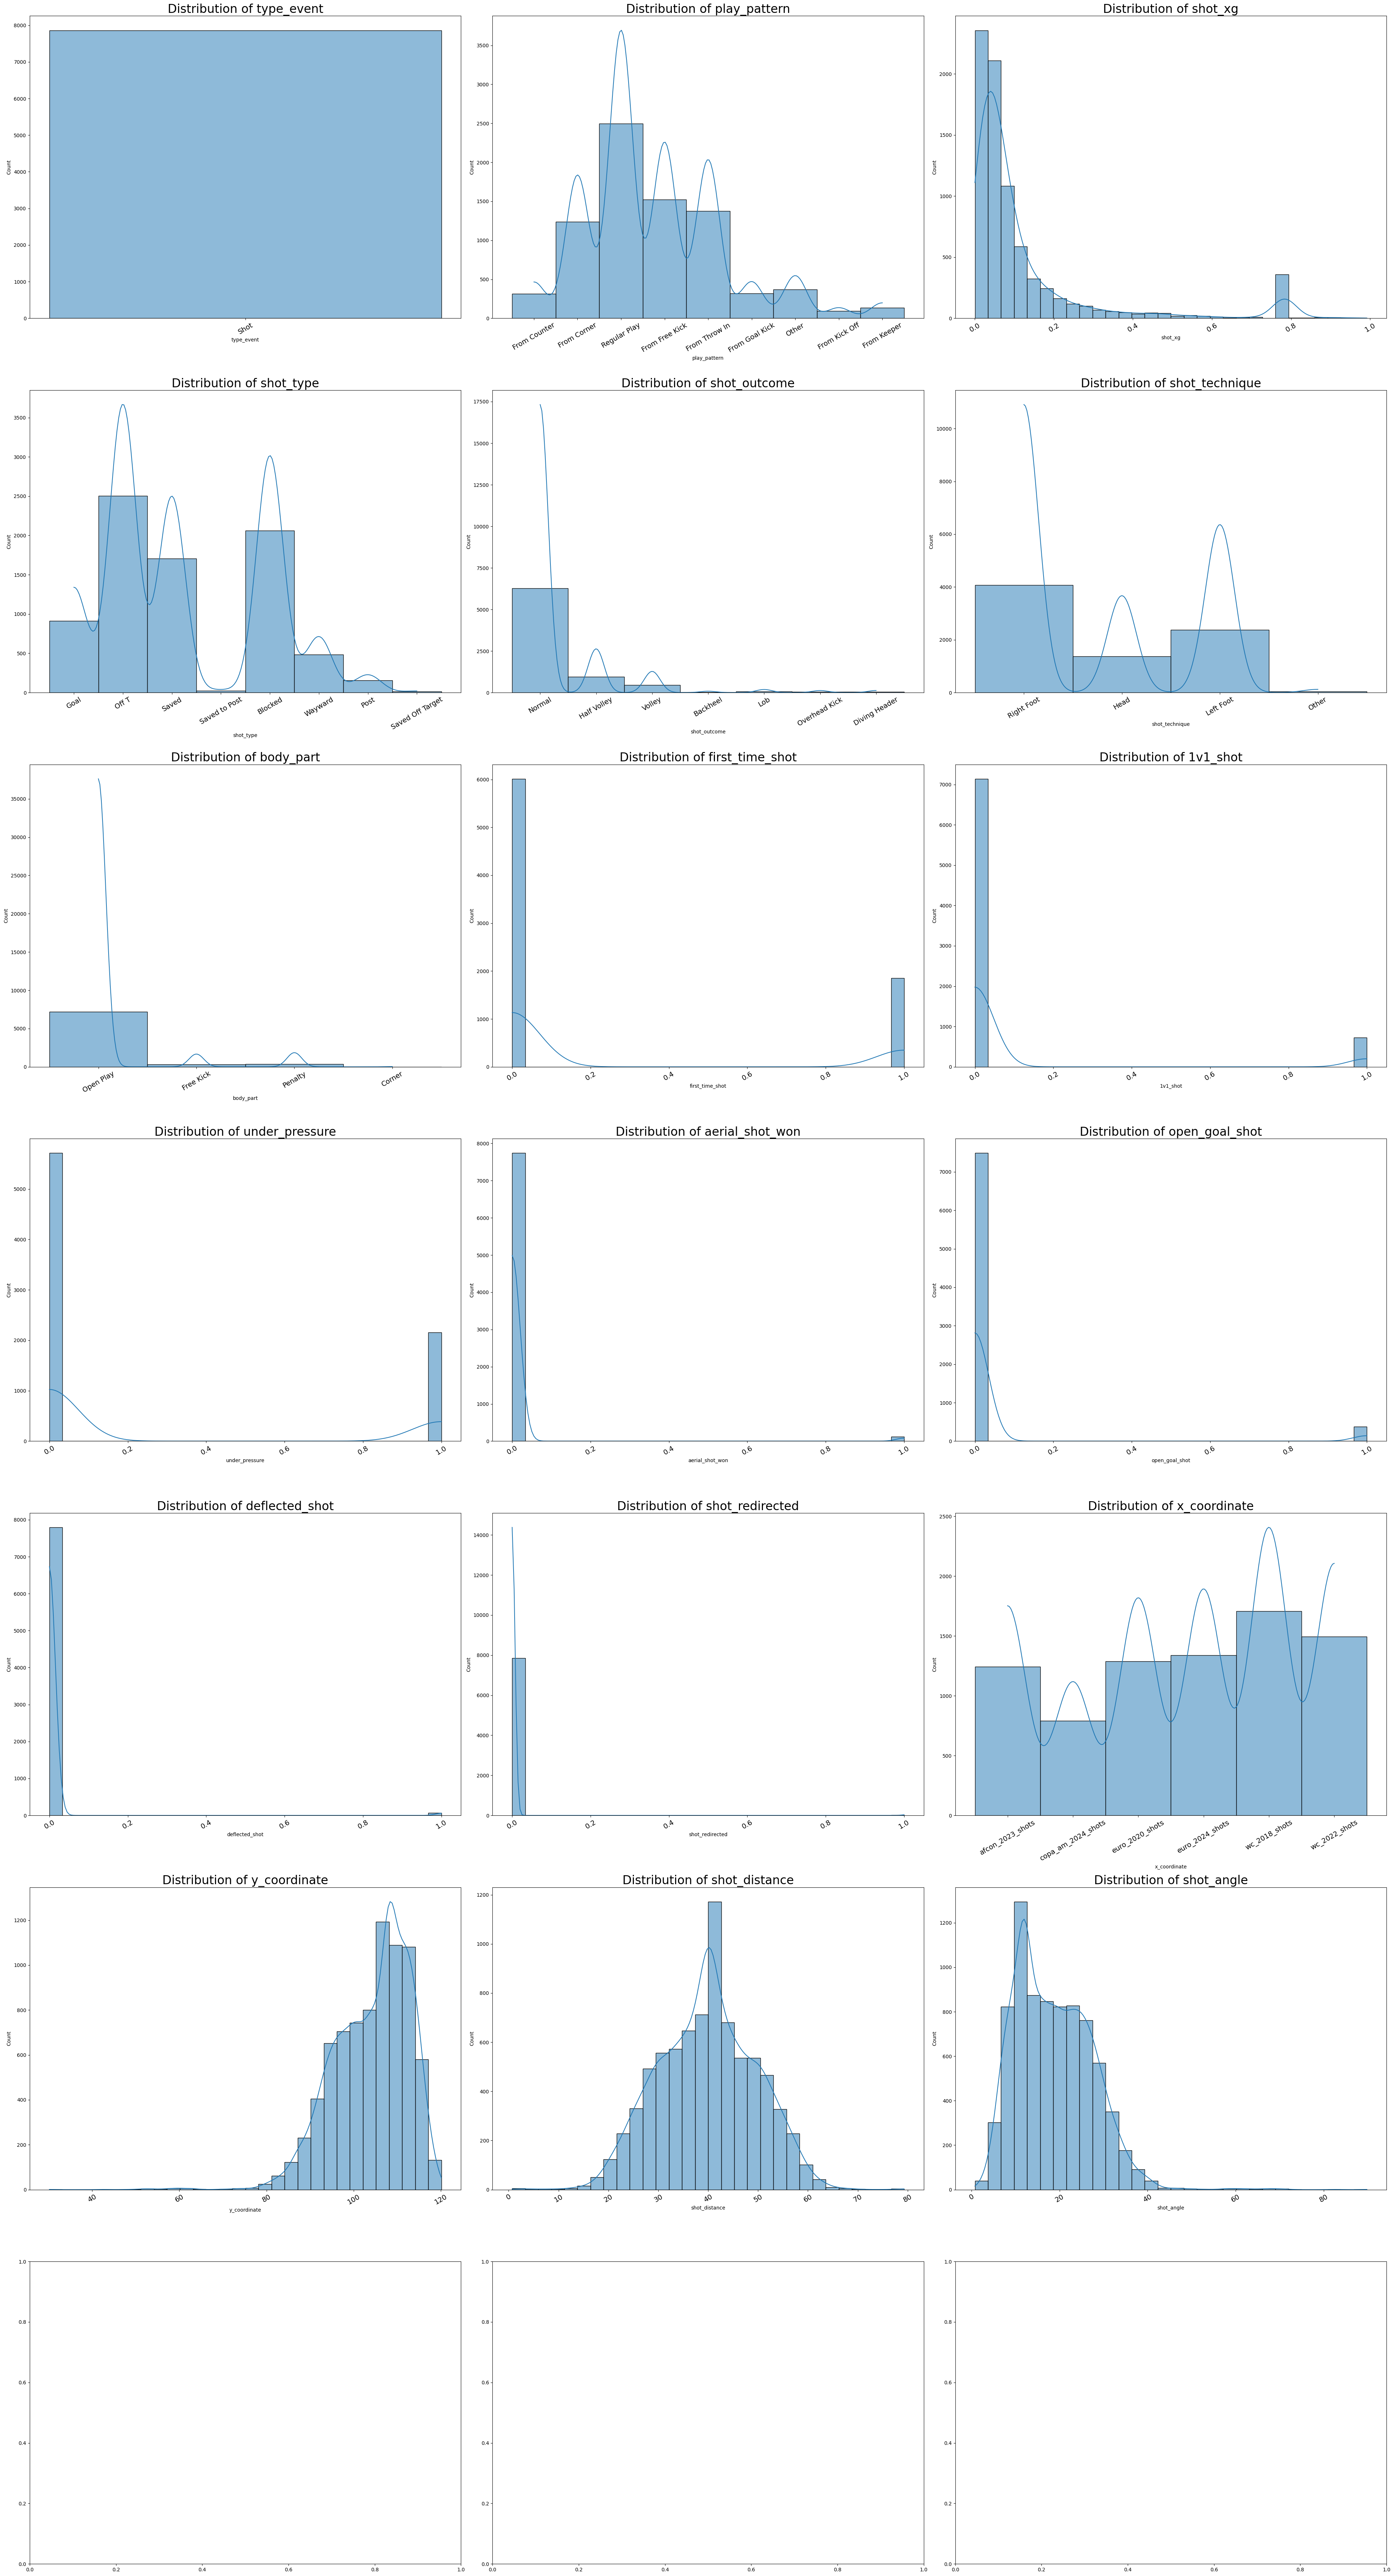

In [66]:
# 1. Histogram: Feature Distributions
features = ['type_event','play_pattern','shot_xg','shot_type','shot_outcome','shot_technique','body_part',
            'first_time_shot','1v1_shot','under_pressure','aerial_shot_won','open_goal_shot',
            'deflected_shot','shot_redirected','x_coordinate','y_coordinate','shot_distance','shot_angle']

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(39, 72))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(df_xg_processed[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=24)
    axes[i].set_xlabel(feature)
    #axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=30, labelsize=14)  # Add this line
plt.tight_layout()
plt.show()

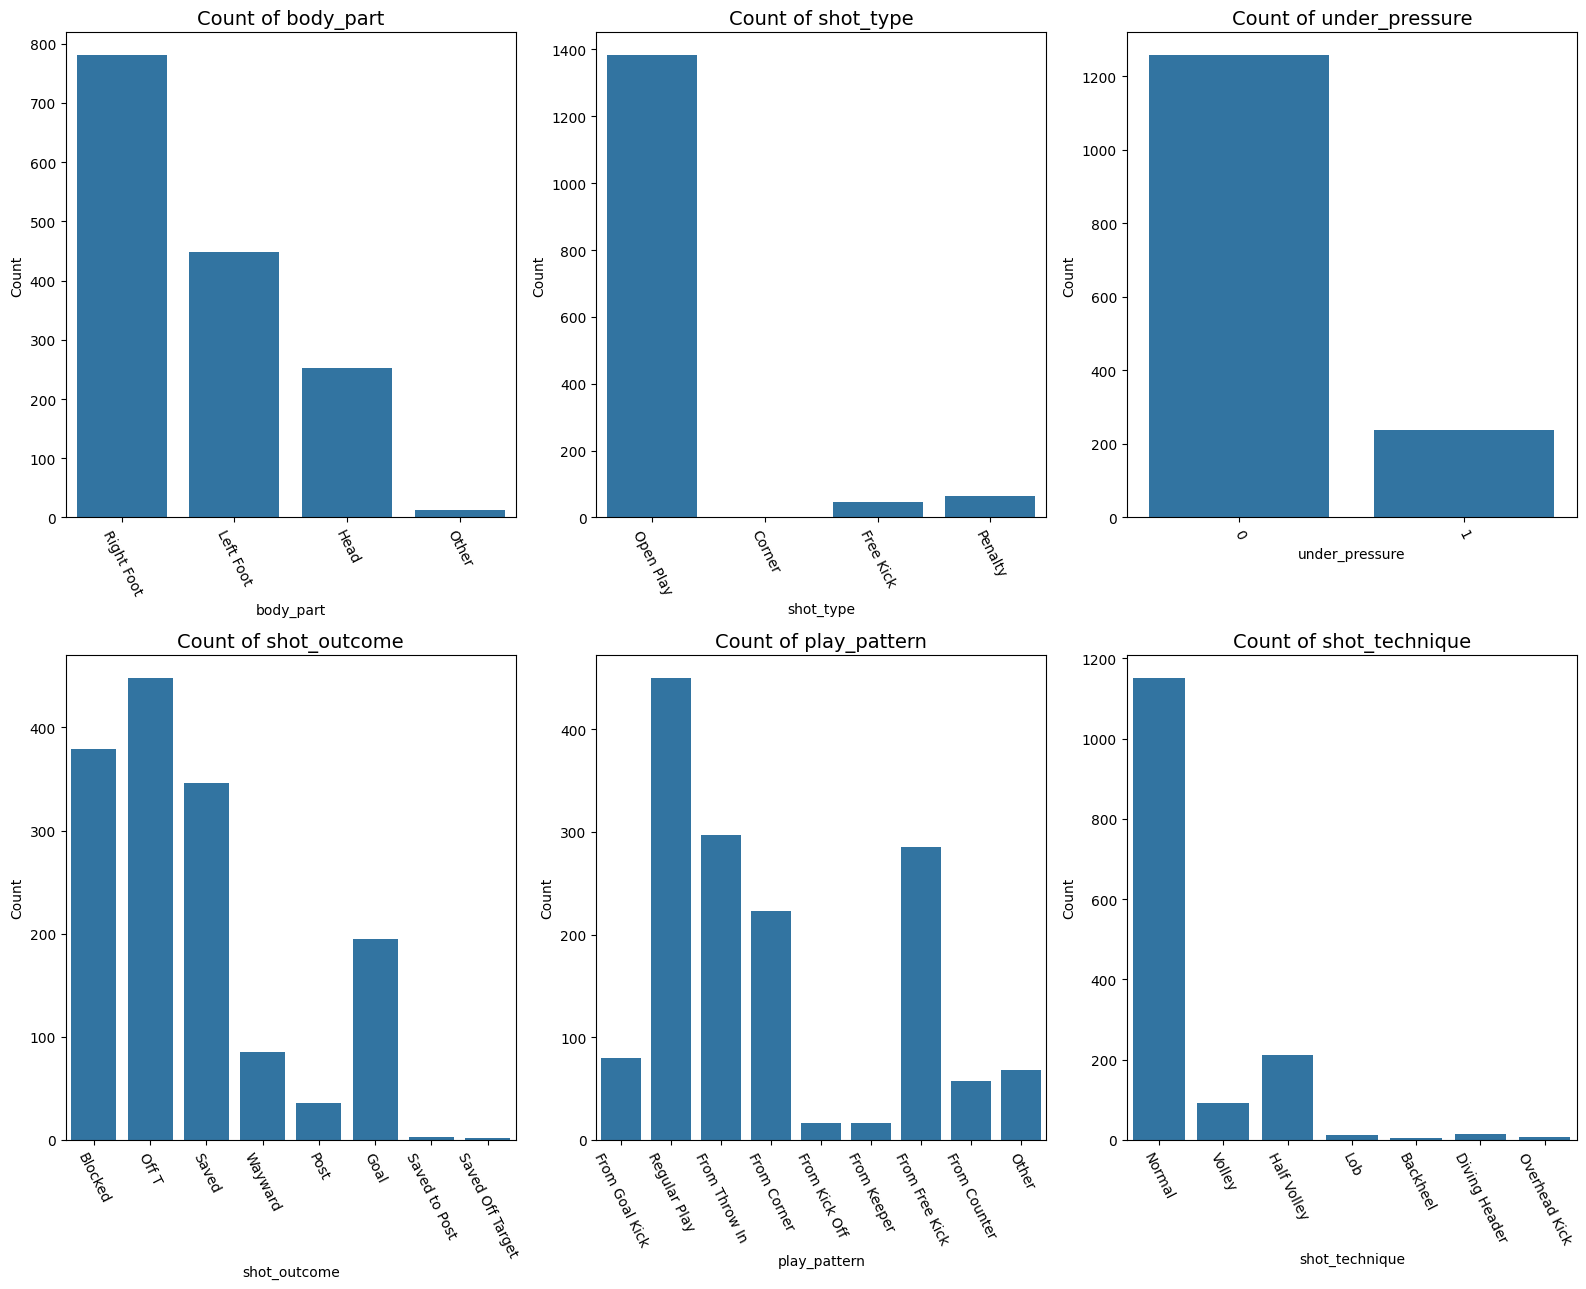

In [ ]:
#2. Bar Chart: Categorical Features
categorical_features = ['body_part', 'shot_type', 'under_pressure','shot_outcome','play_pattern', 'shot_technique']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 13))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_xg_processed, x=feature, ax=axes[i])
    axes[i].set_title(f'Count of {feature}', fontsize = 14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=-63)

plt.tight_layout()
plt.show()

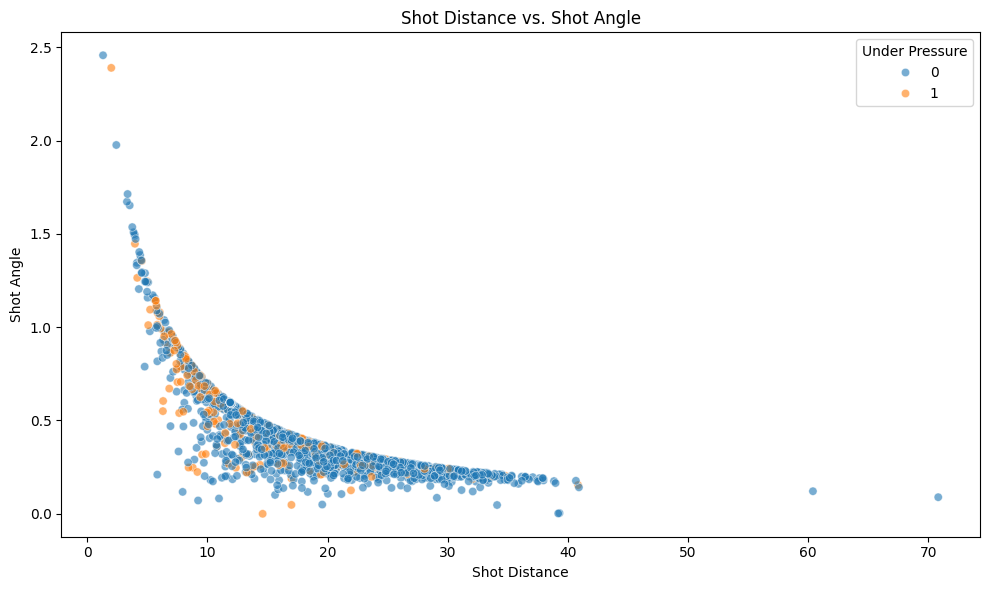

In [79]:
#3. Scatter Plot: Shot Distance vs. Shot Angle
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_xg_processed, x='shot_distance', y='shot_angle', hue='under_pressure', alpha=0.6)
plt.title('Shot Distance vs. Shot Angle')
plt.xlabel('Shot Distance')
plt.ylabel('Shot Angle')
plt.legend(title='Under Pressure')
plt.tight_layout()

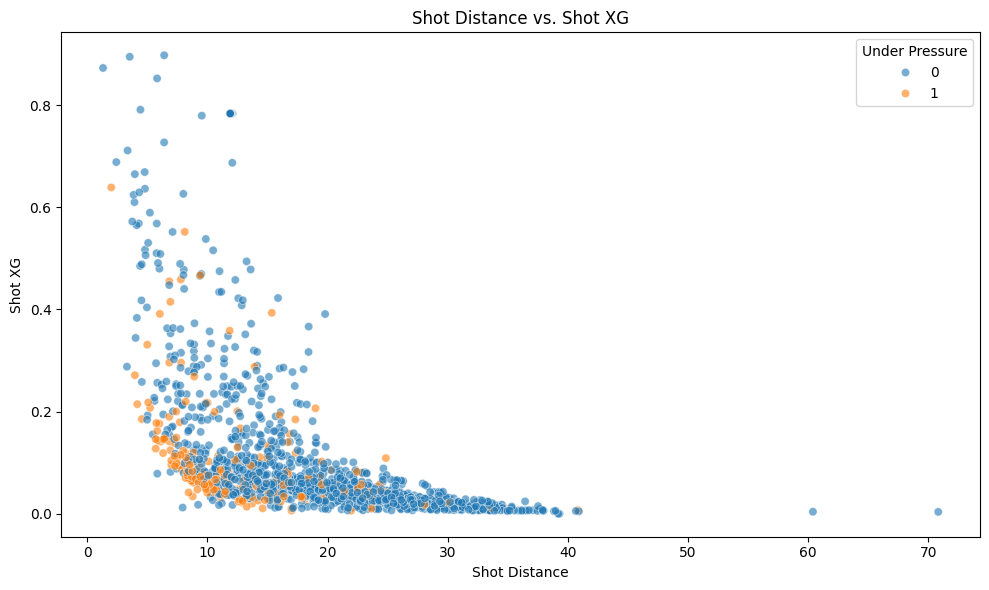

In [80]:
#4. Scatter Plot: Shot Distance vs. Shot XG
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_xg_processed, x='shot_distance', y='shot_xg', hue='under_pressure', alpha=0.6)
plt.title('Shot Distance vs. Shot XG')
plt.xlabel('Shot Distance')
plt.ylabel('Shot XG')
plt.legend(title='Under Pressure')
plt.tight_layout()

In [81]:
def draw_pitch(ax=None, pitch_length=120, pitch_width=80):
    """Function to draw a football pitch with specified dimensions."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    
    # Pitch Outline & Centre Line
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black")
    ax.plot([pitch_length/2, pitch_length/2], [0, pitch_width], color="black")
    
    # Left Penalty Area
    ax.plot([18, 18, 0, 0, 18], [62, 18, 18, 62, 62], color="black")
    # Right Penalty Area
    ax.plot([pitch_length, pitch_length, pitch_length-18, pitch_length-18, pitch_length], 
            [62, 18, 18, 62, 62], color="black")
    
    # Left 6-yard Box
    ax.plot([6, 6, 0, 0, 6], [50, 30, 30, 50, 50], color="black")
    # Right 6-yard Box
    ax.plot([pitch_length, pitch_length, pitch_length-6, pitch_length-6, pitch_length],
            [50, 30, 30, 50, 50], color="black")
    
    # Centre Circle
    centre_circle = plt.Circle((pitch_length/2, pitch_width/2), 10, color="black", fill=False)
    ax.add_patch(centre_circle)
    
    # Penalty Spots
    ax.plot([12, pitch_length-12], [pitch_width/2, pitch_width/2], marker='o', color='black', linestyle='None')
    
    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set limits to the pitch size
    ax.set_xlim(0, pitch_length)
    ax.set_ylim(0, pitch_width)
    
    ax.set_aspect('equal')
    return ax

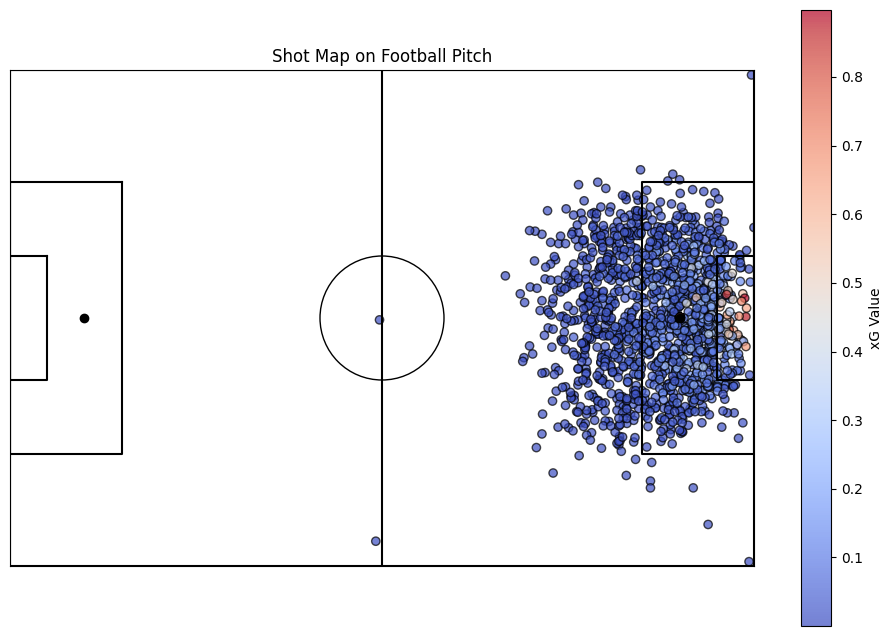

In [84]:
#5. Shot Map on Football Pitch (Scatter Plot of 'x' and 'y')
fig, ax = plt.subplots(figsize=(12, 8))
ax = draw_pitch(ax)

# Plot shots colored by xG
sc = ax.scatter(df_xg_processed['x_coordinate'], df_xg_processed['y_coordinate'], c=df_xg_processed['shot_xg'], cmap='coolwarm', alpha=0.7, edgecolors='k')

plt.colorbar(sc, label='xG Value')
plt.title('Shot Map on Football Pitch')
plt.show()

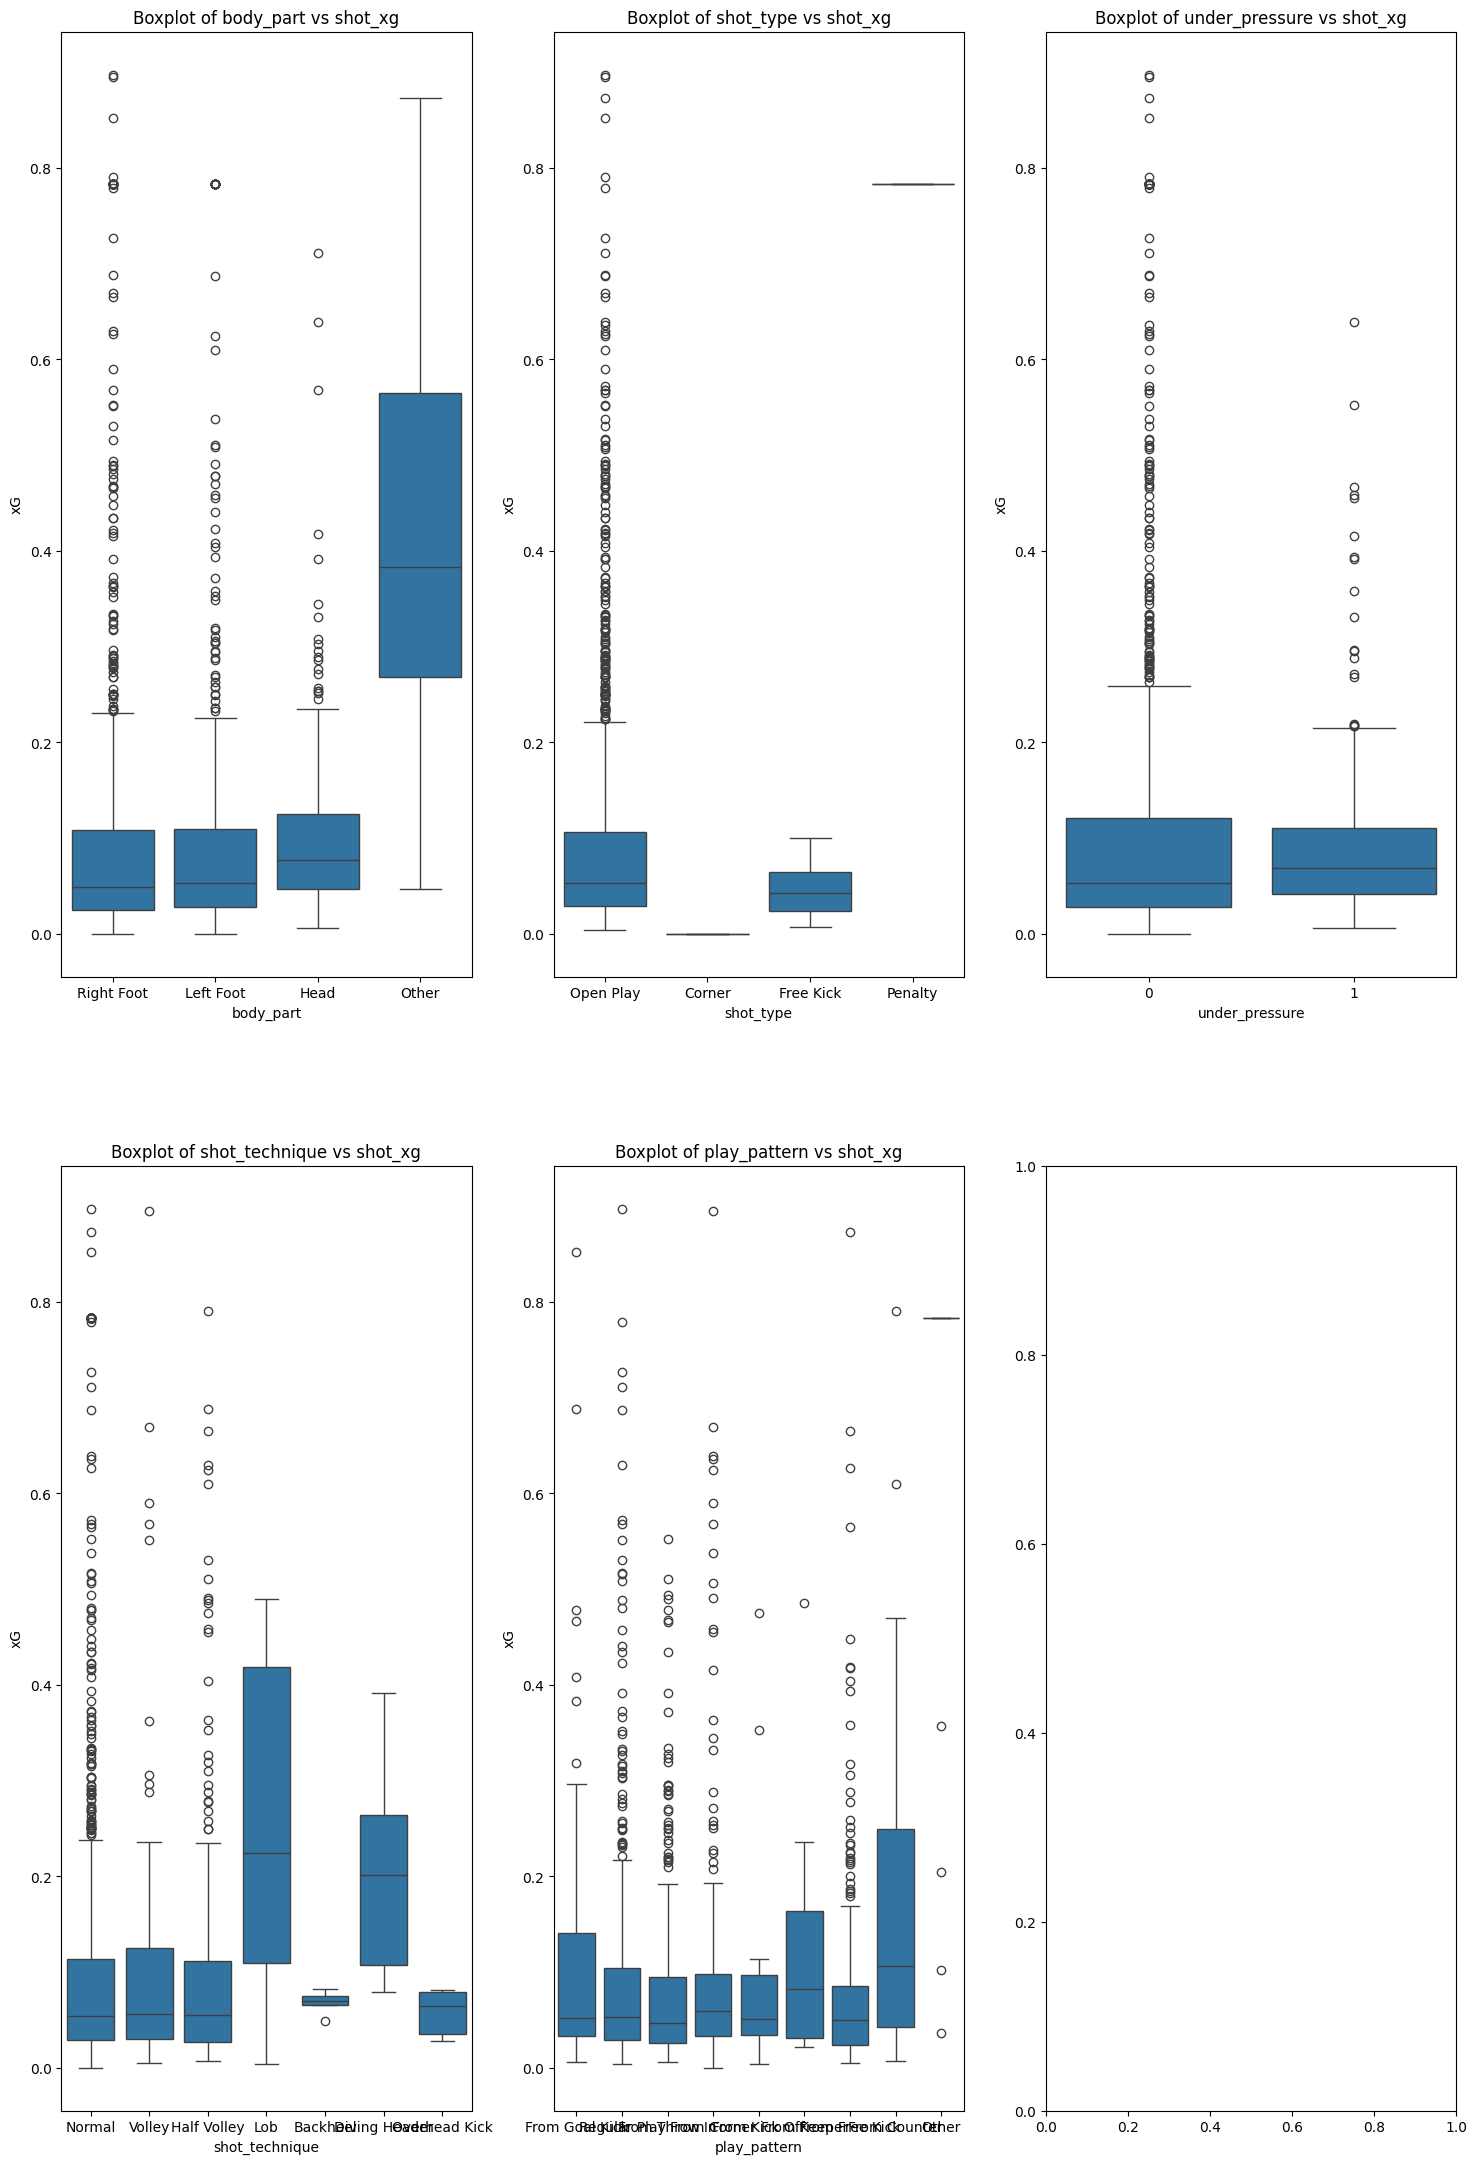

In [88]:
#6. Boxplot: Feature vs. Shot XG
features = [ 'body_part', 'shot_type', 'under_pressure','shot_technique','play_pattern']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 27))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.boxplot(x=df_xg_processed[feature],y=df_xg_processed['shot_xg'],data=df_xg_processed, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} vs shot_xg')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('xG')

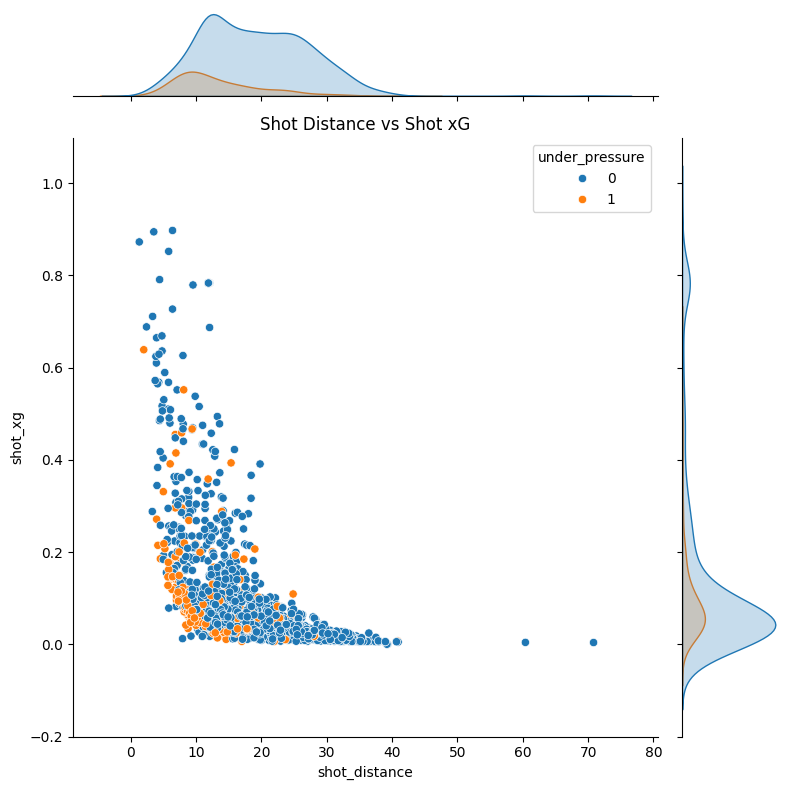

In [112]:
#7. Joint Plot: Shot Distance vs. Shot XG
sns.jointplot(data=df_xg_processed, x='shot_distance', y='shot_xg', kind='scatter', hue='under_pressure', height=8)
plt.title("Shot Distance vs Shot xG")
plt.tight_layout()
plt.show()